In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset (adjust the path as needed)
# Use appropriate header argument based on your file structure
data = pd.read_csv('kddcup.data_10_percent_corrected', header=None)

# Define the columns based on the dataset
# The index numbers for categorical columns based on provided example
protocol_col = 1
service_col = 2
flag_col = 3
label_col = 41  # Assuming the last column is the label

# Convert categorical features to numeric
protocol_encoder = LabelEncoder()
service_encoder = LabelEncoder()
flag_encoder = LabelEncoder()

data[protocol_col] = protocol_encoder.fit_transform(data[protocol_col])
data[service_col] = service_encoder.fit_transform(data[service_col])
data[flag_col] = flag_encoder.fit_transform(data[flag_col])

# Handle missing values (assuming no missing values based on provided data)
# If needed, impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
data_imputed = pd.DataFrame(imputer.fit_transform(data))

# Extract features and labels
features = data_imputed.iloc[:, :-1]
labels = data_imputed.iloc[:, -1]

# Standardize numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Optionally apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(features_scaled)

# Apply K-means clustering
k = 2  # Set the number of clusters (e.g., normal vs attack)
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(features_reduced)

# Add cluster assignments to the dataset
data_imputed['cluster'] = clusters

# Save or analyze the results
data_imputed.to_csv('kddcup_processed_with_clusters.csv', index=False)
print(pd.DataFrame({'Cluster': clusters}).value_counts())

# Optional: Display some sample rows
print(data_imputed.head())


Cluster
0          494019
1               2
Name: count, dtype: int64
   0  1   2  3    4     5  6  7  8  9  ...   33   34    35   36   37   38  \
0  0  1  22  9  181  5450  0  0  0  0  ...  1.0  0.0  0.11  0.0  0.0  0.0   
1  0  1  22  9  239   486  0  0  0  0  ...  1.0  0.0  0.05  0.0  0.0  0.0   
2  0  1  22  9  235  1337  0  0  0  0  ...  1.0  0.0  0.03  0.0  0.0  0.0   
3  0  1  22  9  219  1337  0  0  0  0  ...  1.0  0.0  0.03  0.0  0.0  0.0   
4  0  1  22  9  217  2032  0  0  0  0  ...  1.0  0.0  0.02  0.0  0.0  0.0   

    39   40       41 cluster  
0  0.0  0.0  normal.       0  
1  0.0  0.0  normal.       0  
2  0.0  0.0  normal.       0  
3  0.0  0.0  normal.       0  
4  0.0  0.0  normal.       0  

[5 rows x 43 columns]


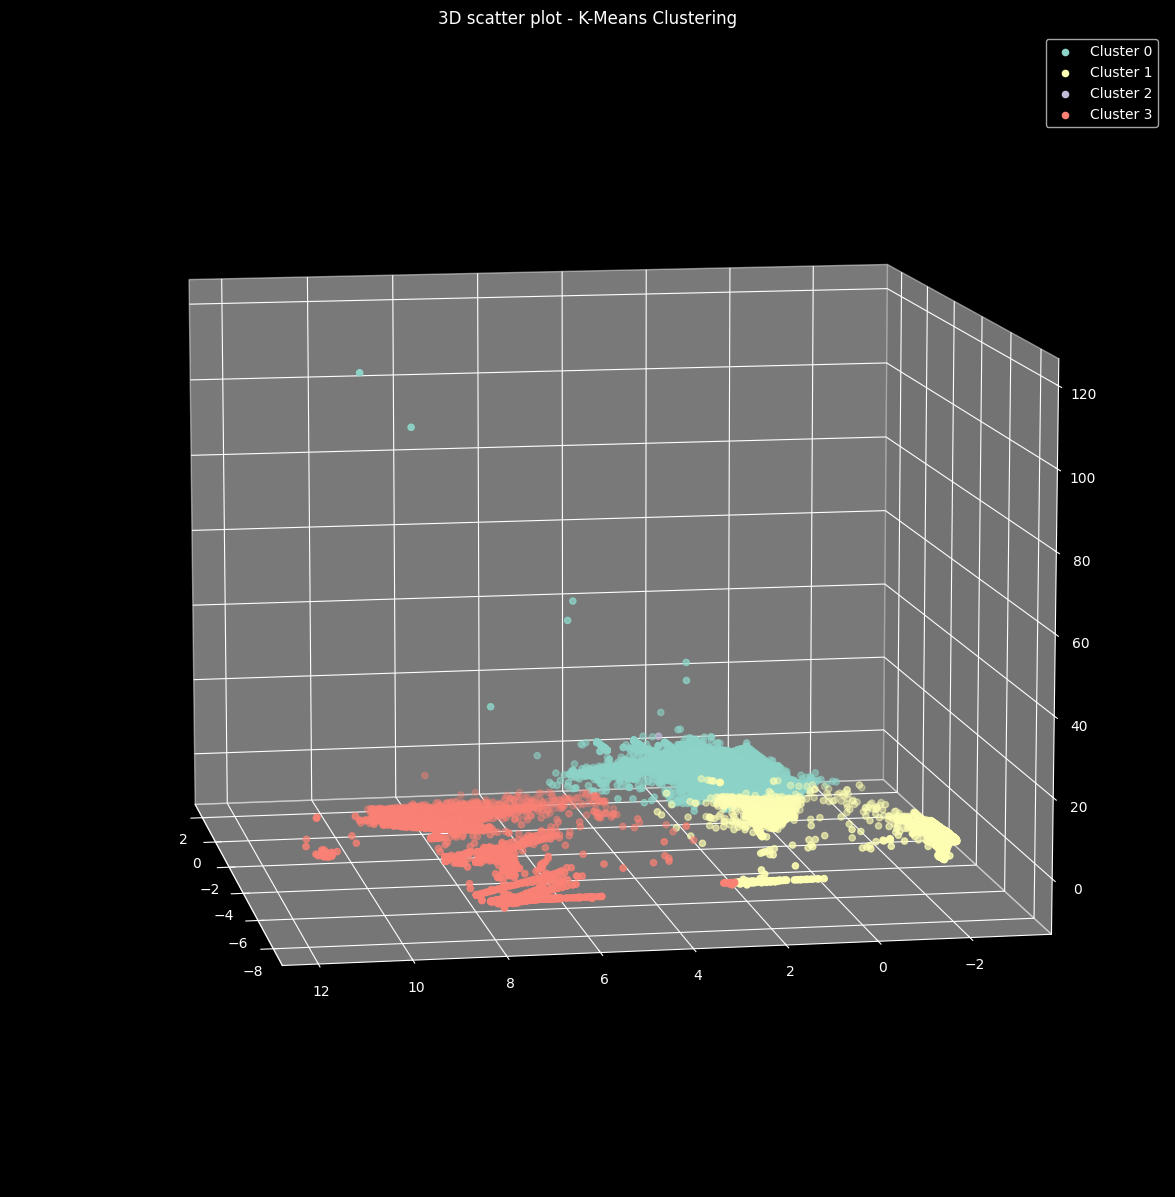

K-Means Cluster Centers:
 [[ 1.66507465e+00  4.36368339e-02  2.79342681e-01 -2.92050139e-02
   1.62061656e-02  7.85295275e-02 -1.22707828e-02  4.83850167e-03
  -4.21307397e-02  1.24076365e-02  7.78051513e-04  5.23865019e-04
  -4.37034360e-03  2.02416624e-02  4.99843366e-03 -2.56158317e-03
   2.06657235e-03  4.38005224e-03  2.86874416e-04 -2.87234821e-02]
 [-5.40897844e+00 -2.54462184e+00 -4.21266097e-01  5.14141656e-02
  -6.42481760e-02 -1.75823691e-01  3.55330975e-02 -5.91561604e-03
   1.99570934e-01 -3.41514523e-02  1.64685289e-03  7.55810100e-03
  -2.16257995e-02 -9.18555185e-02 -4.87488111e-02  3.23516237e-02
  -5.12317266e-03 -3.09986505e-02  6.14901003e-04  1.02407838e-01]
 [-2.87032499e+00  2.15076873e+00  1.00239599e+01  1.14622982e+01
   1.27141113e+01  2.02949700e+01  7.23898715e+01 -6.45622607e+01
  -2.79086875e+00 -2.23087741e+01 -7.01978483e+00 -4.14311928e+01
   1.28950117e+02 -1.11317931e+01 -1.11683292e+01  4.12448909e+01
   9.50073631e+00 -3.91970103e+00 -3.95461618e+0

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (adjust the path as needed)
data = pd.read_csv('kddcup.data_10_percent_corrected', header=None)

# Define column names (based on feature descriptions)
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

data.columns = column_names

# Convert categorical features to numeric
categorical_cols = [
    'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login',
    'is_guest_login'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values (if any)
# Assuming no missing values as per the dataset provided
# If missing values are present, use SimpleImputer to handle them

# Extract features and labels
features = data.drop(columns=['label'])
labels = data['label']

# Standardize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Optionally apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(scaled_features)

# Apply K-means clustering
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=42)
data['Cluster_No'] = kmeans.fit_predict(features_reduced)

# Plotting
plt.style.use('dark_background')
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection="3d")

# Scatter plot with different colors for different clusters
for i in range(4):
    ax.scatter3D(
        features_reduced[data['Cluster_No'] == i, 0],  # Replace 0 with PCA component index
        features_reduced[data['Cluster_No'] == i, 1],  
        features_reduced[data['Cluster_No'] == i, 2], 
        label=f"Cluster {i}"
    )

ax.view_init(10, 170)
plt.title("3D scatter plot - K-Means Clustering")
plt.legend()
plt.show()

# Cluster centers
print("K-Means Cluster Centers:\n", kmeans.cluster_centers_)

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Cluster statistics
print("Mean values for each cluster:\n", data.groupby('Cluster_No')[numeric_cols].mean())
print("Min values for each cluster:\n", data.groupby('Cluster_No')[numeric_cols].min())
print("Max values for each cluster:\n", data.groupby('Cluster_No')[numeric_cols].max())
print("Standard deviation for each cluster:\n", data.groupby('Cluster_No')[numeric_cols].std())


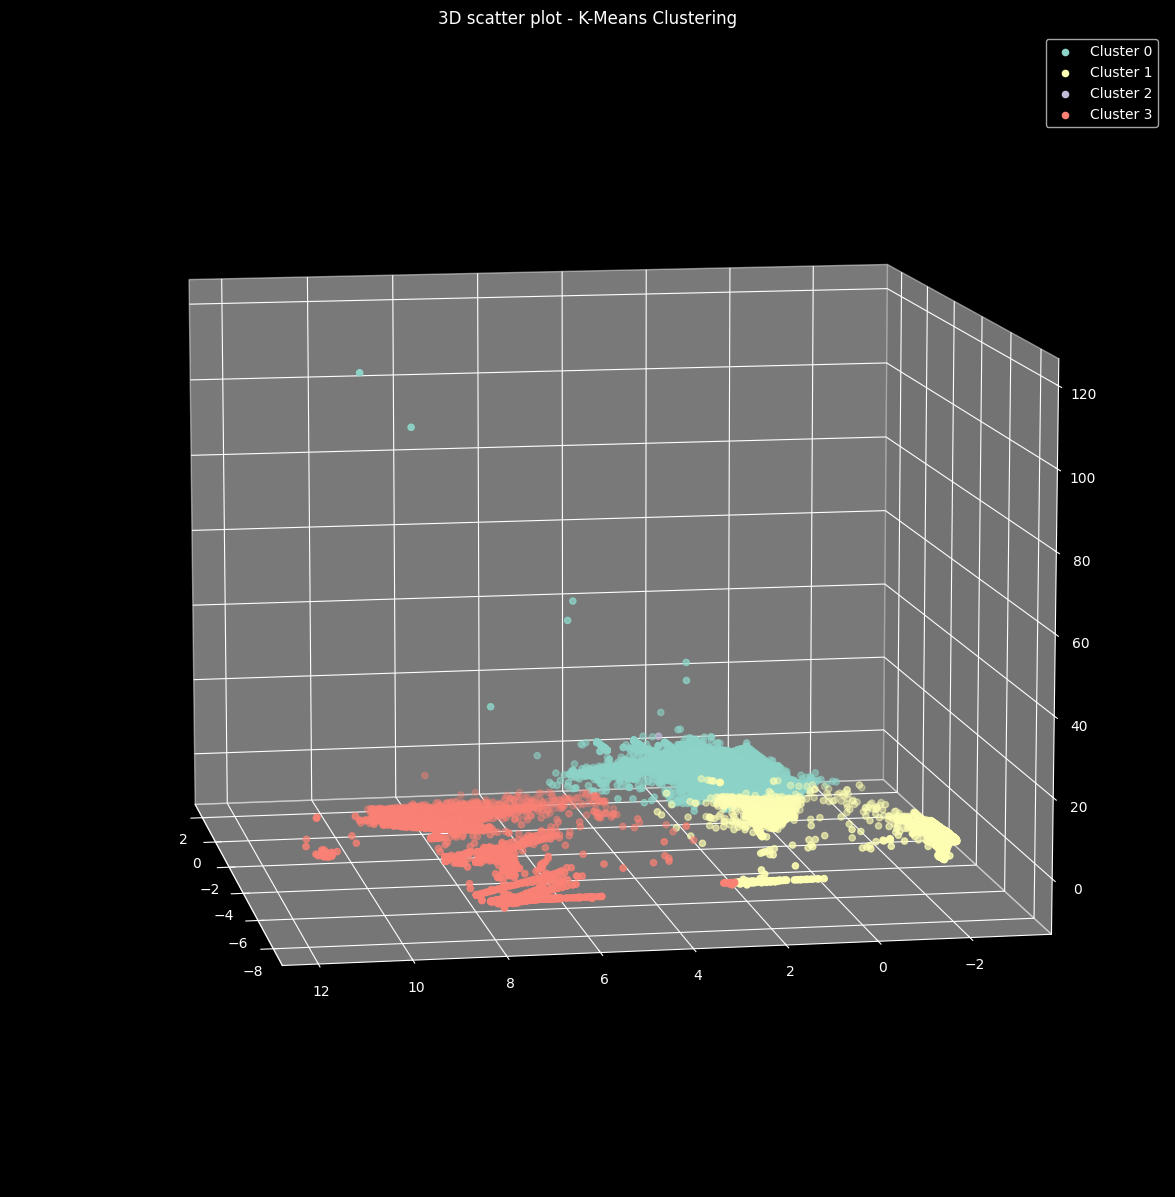

Mean values for each cluster:
                 duration  protocol_type    service      flag    src_bytes  \
Cluster_No                                                                  
0              47.273924       0.297428  17.244255  8.997302  2090.485969   
1              38.333169       1.014461  44.204367  5.100766  7897.581490   
2           11046.750000       1.000000  52.833333  9.000000  4013.583333   
3              83.139245       1.000000  39.879996  1.112860   106.840489   

               dst_bytes      land  wrong_fragment    urgent       hot  ...  \
Cluster_No                                                              ...   
0            1131.123823  0.000000        0.007697  0.000019  0.044878  ...   
1              23.600816  0.000247        0.003139  0.000000  0.000325  ...   
2           38859.833333  0.000000        0.000000  0.000000  3.583333  ...   
3              21.284219  0.000000        0.000000  0.000000  0.002936  ...   

            dst_host_count  dst

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset (adjust the path as needed)
data = pd.read_csv('kddcup.data_10_percent_corrected', header=None)

# Define column names (based on feature descriptions)
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

data.columns = column_names

# Convert categorical features to numeric
categorical_cols = [
    'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login',
    'is_guest_login'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values (if any)
# Assuming no missing values as per the dataset provided
# If missing values are present, use SimpleImputer to handle them

# Extract features and labels
features = data.drop(columns=['label'])
labels = data['label']

# Ensure that all feature columns are numeric
numeric_features = features.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Optionally apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(scaled_features)

# Apply K-means clustering
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=42)
data['Cluster_No'] = kmeans.fit_predict(features_reduced)

# Plotting
plt.style.use('dark_background')
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection="3d")

# Scatter plot with different colors for different clusters
for i in range(4):
    ax.scatter3D(
        features_reduced[data['Cluster_No'] == i, 0],  # Replace 0 with PCA component index
        features_reduced[data['Cluster_No'] == i, 1],  # Replace 1 with PCA component index
        features_reduced[data['Cluster_No'] == i, 2],  # Replace 2 with PCA component index
        label=f"Cluster {i}"
    )

ax.view_init(10, 170)
plt.title("3D scatter plot - K-Means Clustering")
plt.legend()
plt.show()

# Cluster statistics
# Group by cluster number and calculate statistics only for numeric columns
numeric_columns = numeric_features.columns
print("Mean values for each cluster:\n", data.groupby('Cluster_No')[numeric_columns].mean())
print("Min values for each cluster:\n", data.groupby('Cluster_No')[numeric_columns].min())
print("Max values for each cluster:\n", data.groupby('Cluster_No')[numeric_columns].max())
print("Standard deviation for each cluster:\n", data.groupby('Cluster_No')[numeric_columns].std())


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       50     9        829        327     0   
1         0              2       45     9        105        146     0   
2         0              2       45     9        105        146     0   
3         0              2       45     9        105        146     0   
4         0              1       19     9         19          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 113   
1               0       0    0  ...                 253   
2               0       0    0  ...                 254   
3               0       0    0  ...                 253   
4               0       0    0  ...                  46   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.88                    0.25   
1                    0.99                    0.01   
2                    1.00                    0.

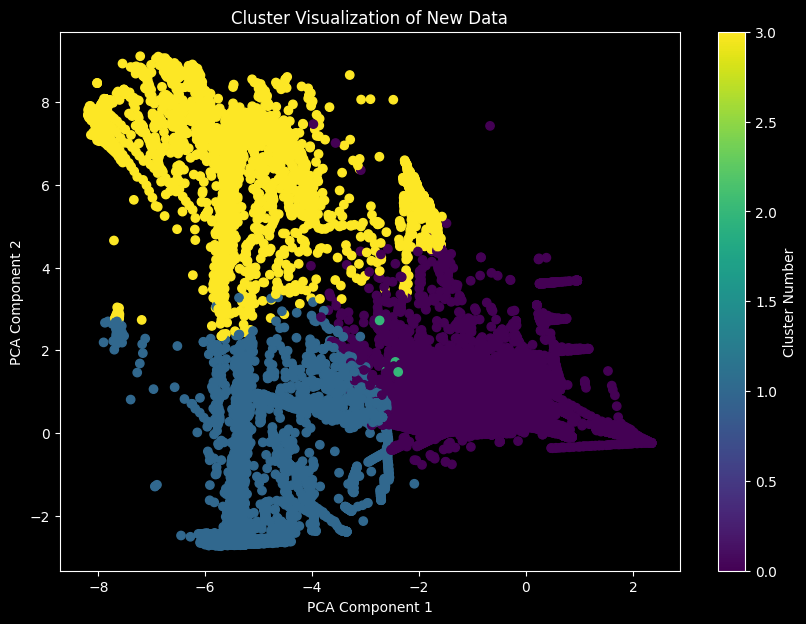

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the new test data
new_data = pd.read_csv('kddcup.newtestdata_10_percent_unlabeled', header=None)

# Define column names (based on feature descriptions)
new_column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
]

new_data.columns = new_column_names

# List of categorical columns
categorical_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

# Assume `label_encoders` is a dictionary with the encoders trained on the original data
# Update encoders with unseen categories
def update_encoder_with_unseen(encoder, new_data, column):
    unseen_labels = set(new_data[column].unique()) - set(encoder.classes_)
    if unseen_labels:
        encoder.classes_ = np.concatenate([encoder.classes_, np.array(list(unseen_labels))])
    new_data[column] = encoder.transform(new_data[column])

# Apply the update to the categorical columns
for col in categorical_cols:
    update_encoder_with_unseen(label_encoders[col], new_data, col)

# Extract features
new_features = new_data

# Standardize numeric features
scaled_new_features = scaler.transform(new_features)

# Optionally apply PCA if you used it before
features_new_reduced = pca.transform(scaled_new_features)

# Predict clusters using the trained KMeans model
new_data['Cluster_No'] = kmeans.predict(features_new_reduced)

# Display a sample of the clustered data
print(new_data.head())

# Optional: Analyze the distribution of clusters
cluster_distribution = new_data['Cluster_No'].value_counts()
print("\nCluster Distribution in New Data:")
print(cluster_distribution)

# Optional: Visualize the clusters (if dimensionality is reduced to 3 for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(features_new_reduced[:, 0], features_new_reduced[:, 1], c=new_data['Cluster_No'], cmap='viridis')
plt.title('Cluster Visualization of New Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Number')
plt.show()

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (adjust the path as needed)
data = pd.read_csv('kddcup.data_10_percent_corrected', header=None)

# Define column names (based on feature descriptions)
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

data.columns = column_names

# Convert categorical features to numeric
categorical_cols = [
    'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login',
    'is_guest_login'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values (if any)
# Assuming no missing values as per the dataset provided
# If missing values are present, use SimpleImputer to handle them

# Extract features and labels
features = data.drop(columns=['label'])
labels = data['label']

# Standardize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Optionally apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(scaled_features)

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       50     9        829        327     0   
1         0              2       45     9        105        146     0   
2         0              2       45     9        105        146     0   
3         0              2       45     9        105        146     0   
4         0              1       19     9         19          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 113   
1               0       0    0  ...                 253   
2               0       0    0  ...                 254   
3               0       0    0  ...                 253   
4               0       0    0  ...                  46   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.88                    0.25   
1                    0.99                    0.01   
2                    1.00                    0.

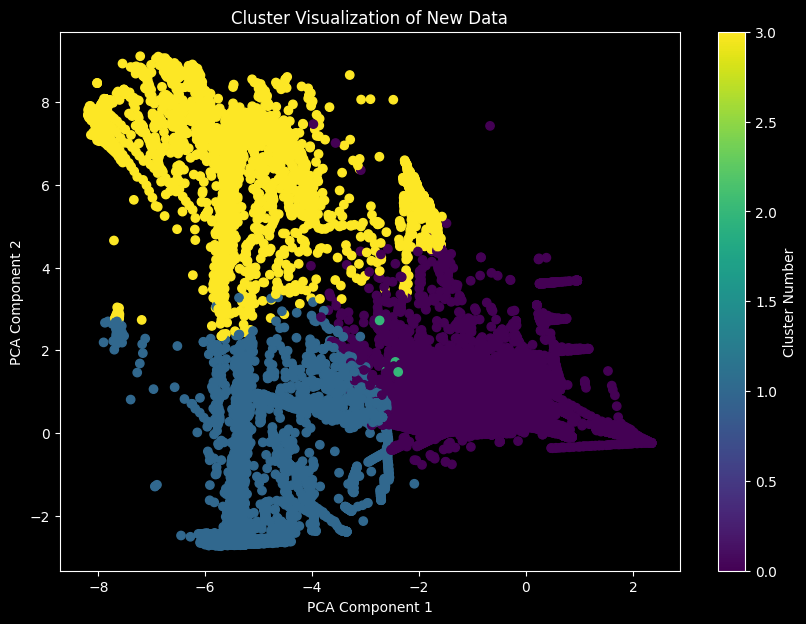

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ensure we only select the original features (exclude 'Cluster_No' if it exists)
new_features = new_data.drop(columns=['Cluster_No'], errors='ignore')

# Standardize numeric features
scaled_new_features = scaler.transform(new_features)

# Optionally apply PCA if you used it before
features_new_reduced = pca.transform(scaled_new_features)

# Predict clusters using the trained KMeans model
new_data['Cluster_No'] = kmeans.predict(features_new_reduced)

# Display a sample of the clustered data
print(new_data.head())

# Optional: Analyze the distribution of clusters
cluster_distribution = new_data['Cluster_No'].value_counts()
print("\nCluster Distribution in New Data:")
print(cluster_distribution)

# Optional: Visualize the clusters (if dimensionality is reduced to 3 for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(features_new_reduced[:, 0], features_new_reduced[:, 1], c=new_data['Cluster_No'], cmap='viridis')
plt.title('Cluster Visualization of New Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Number')
plt.show()

In [26]:
!conda update threadpoolctl joblib scikit-learn



PackageNotInstalledError: Package is not installed in prefix.
  prefix: /opt/conda
  package name: threadpoolctl




In [27]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


In [28]:
import pandas as pd  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
  
# Load the dataset (adjust the path as needed)  
data = pd.read_csv('kddcup.data_10_percent_corrected', header=None)  
  
# Define column names (based on feature descriptions)  
column_names = [  
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',  
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',  
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',  
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',   
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',   
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',   
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',   
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',   
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',   
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',   
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'  
]  
  
data.columns = column_names  
  
# Convert categorical features to numeric  
categorical_cols = [  
    'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login',  
    'is_guest_login'  
]  
  
label_encoders = {}  
for col in categorical_cols:  
    le = LabelEncoder()  
    data[col] = le.fit_transform(data[col])  
    label_encoders[col] = le  
  
features = data.drop(columns=['label'])  
labels = data['label']  
  
scaler = StandardScaler()  
scaled_features = scaler.fit_transform(features)  
  
pca = PCA(n_components=0.95)  
features_reduced = pca.fit_transform(scaled_features)  
  
inertias = []    
  
for i in range(1, 25):    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)    
    kmeans.fit(features_reduced)   
    inertias.append(kmeans.inertia_)   
  
# Plot the elbow curve  
plt.plot(range(1, 25), inertias, marker='o')  
plt.title('The Elbow Method')  
plt.xlabel('Number of clusters')  
plt.ylabel('Inertia')  
plt.show() 

: 